In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

## Création du dataset de base par concaténation des deux jeux de données

In [73]:
df_c = pd.read_csv("../data/customers.csv", delimiter=";")
df_i = pd.read_csv("../data/indicators.csv", delimiter=";")

print(f"Same size ? >> {len(df_c)==len(df_i)}")
print(f"Same amount of unique client id ? >> {len(df_c['ID_CLIENT'].unique()) == len(df_i['ID_CLIENT'].unique())}")
print(f"Only unique ID ? >> {len(df_c)==len(df_c['ID_CLIENT'].unique())}")

Same size ? >> True
Same amount of unique client id ? >> True
Only unique ID ? >> True


In [74]:
df = df_c.merge(df_i,on="ID_CLIENT")

df



ID_CLIENT          DATE_ENTREE               NOM       PAYS SEXE  AGE  \
0      15688172  2015-01-01 00:00:00               Tai    Espagne    H   40   
1      15787258  2014-05-01 00:00:00              Ross    Espagne    F   29   
2      15791700  2018-01-01 00:00:00  Ugochukwutubelum  Allemagne    H   47   
3      15569438  2010-03-01 00:00:00               Mai  Allemagne    H   36   
4      15778947  2017-01-01 00:00:00          Sullivan     France    H   36   
...         ...                  ...               ...        ...  ...  ...   
9945   15711457  2013-01-01 00:00:00              Herz     France    F   28   
9946   15712403  2019-05-01 00:00:00          McMillan     France    F   61   
9947   15576263  2015-04-01 00:00:00          Clements     France    F   22   
9948   15745843  2016-02-01 00:00:00            Kinlaw    Espagne    F   31   
9949   15753229  2011-04-01 00:00:00          Genovese     France    H   29   

     MEMBRE_ACTIF    BALANCE  NB_PRODUITS CARTE_CREDIT    SALAIRE  \
0              No       0.00            2          Yes   88947.56   
1              No       0.00           16          Yes        NaN   
2             Yes  118079.47            4          Yes  143007.49   
3              No  106702.94            2           No  198313.69   
4             Yes       0.00            2          Yes    8742.91   
...           ...        ...          ...          ...        ...   
9945          Yes  124540.28            1           No  188850.89   
9946           No       0.00            1          Yes   61108.56   
9947           No       0.00            1          Yes   22303.17   
9948          Yes       0.00            2          Yes  136610.02   
9949          Yes  127414.55            1          Yes  134459.12   

      SCORE_CREDIT CHURN  
0            677.0    No  
1              NaN    No  
2            773.0   Yes  
3            607.0    No  
4            628.0    No  
...            ...   ...  
9945         755.0    No  
9946         589.0   Yes  
9947         759.0    No  
9948         689.0    No  
9949         802.0    No  

[9950 rows x 13 columns]

## Exploration du dataset

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9950 entries, 0 to 9949
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID_CLIENT     9950 non-null   int64  
 1   DATE_ENTREE   9950 non-null   object 
 2   NOM           9950 non-null   object 
 3   PAYS          9950 non-null   object 
 4   SEXE          9950 non-null   object 
 5   AGE           9950 non-null   int64  
 6   MEMBRE_ACTIF  9950 non-null   object 
 7   BALANCE       9932 non-null   float64
 8   NB_PRODUITS   9950 non-null   int64  
 9   CARTE_CREDIT  9950 non-null   object 
 10  SALAIRE       9721 non-null   float64
 11  SCORE_CREDIT  9391 non-null   float64
 12  CHURN         9950 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 1.1+ MB


In [14]:
df.describe()

ID_CLIENT          AGE        BALANCE  NB_PRODUITS        SALAIRE  \
count  9.950000e+03  9950.000000    9932.000000  9950.000000    9721.000000   
mean   1.569095e+07    40.357789   76449.491196     1.810653  100043.067155   
std    7.195947e+04    15.601139   62420.386792     2.049671   57556.160692   
min    1.556570e+07    18.000000       0.000000     1.000000      11.580000   
25%    1.562854e+07    32.000000       0.000000     1.000000   50972.600000   
50%    1.569071e+07    37.000000   97221.520000     2.000000  100130.950000   
75%    1.575324e+07    44.000000  127639.372500     2.000000  149370.930000   
max    1.581569e+07   166.000000  250898.090000    18.000000  199992.480000   

       SCORE_CREDIT  
count   9391.000000  
mean     650.990629  
std       96.505558  
min      350.000000  
25%      584.000000  
50%      652.000000  
75%      718.000000  
max      850.000000

## Cleaning et formatage des données

In [75]:
df.isna().sum()

ID_CLIENT         0
DATE_ENTREE       0
NOM               0
PAYS              0
SEXE              0
AGE               0
MEMBRE_ACTIF      0
BALANCE          18
NB_PRODUITS       0
CARTE_CREDIT      0
SALAIRE         229
SCORE_CREDIT    559
CHURN             0
dtype: int64

### Analyse de la répartition des NaN

In [76]:

df['includes_NaN'] = df.isnull().any(axis = 1)


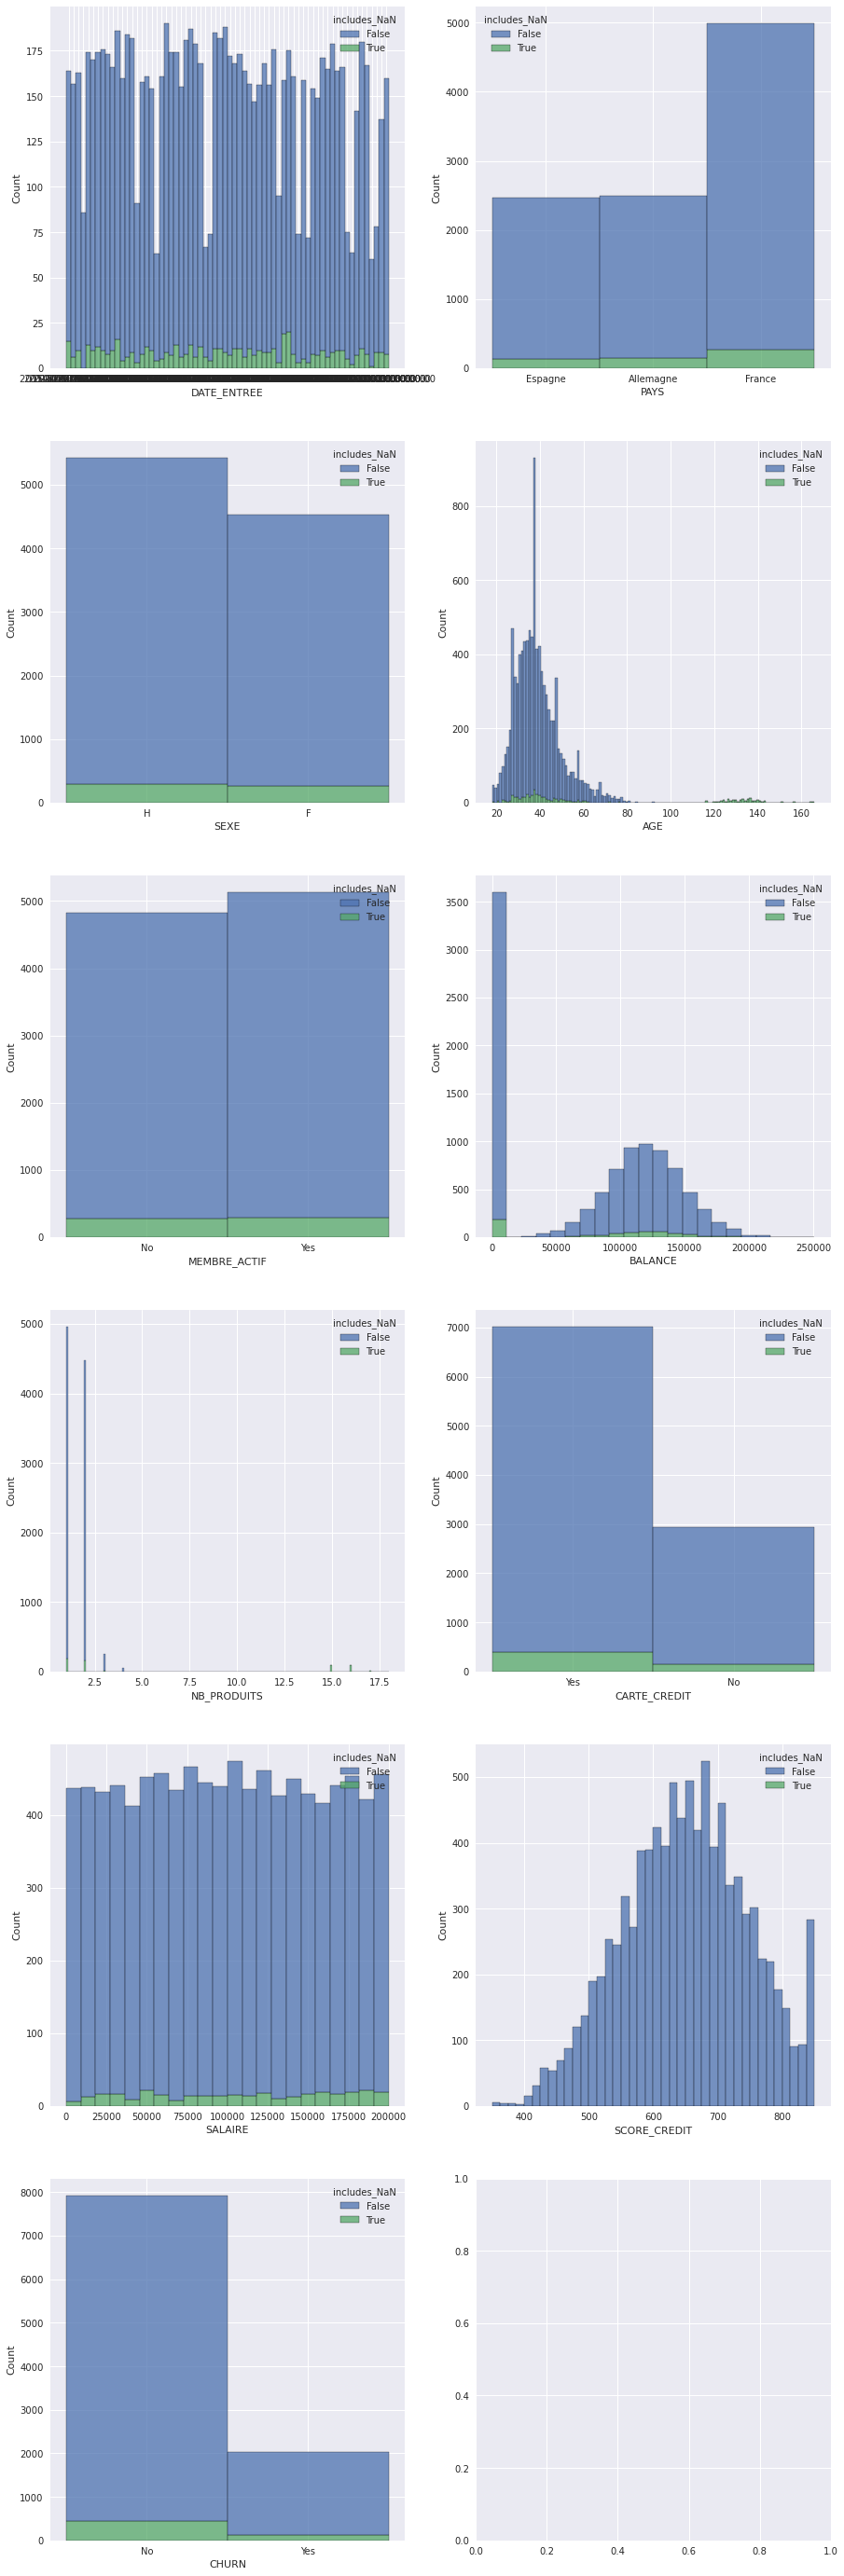

In [19]:
plt.style.use('seaborn')

fig, axs = plt.subplots(6,2, figsize = [15,50])
i=0
for col in df.columns:
    if (col != "includes_NaN") & (col !="ID_CLIENT") & (col !="NOM"):
        sns.histplot(df, x = col, hue="includes_NaN", multiple = 'stack', ax = axs[i//2, i%2])  
        i+=1

### Traitement des NaN et données aberrantes (âge supérieur à 100 ans)

In [78]:
df_with_NaN = df[df["includes_NaN"]==True]
df_without_NaN = df.dropna()

print(df_with_NaN.describe())
print(df_with_NaN.info())
print(df_without_NaN.describe())


          ID_CLIENT         AGE        BALANCE  NB_PRODUITS        SALAIRE  \
count  5.590000e+02  559.000000     541.000000   559.000000     330.000000   
mean   1.569471e+07   64.822898   78564.891885     6.509839  107592.934000   
std    7.095856e+04   43.056091   61258.613614     6.765887   58296.837173   
min    1.556588e+07   18.000000       0.000000     1.000000     371.050000   
25%    1.563475e+07   34.000000       0.000000     1.000000   53119.062500   
50%    1.569623e+07   42.000000   98710.890000     2.000000  110188.385000   
75%    1.575536e+07  121.000000  127197.140000    15.000000  160126.347500   
max    1.581566e+07  166.000000  201696.070000    18.000000  199857.470000   

       SCORE_CREDIT  
count           0.0  
mean            NaN  
std             NaN  
min             NaN  
25%             NaN  
50%             NaN  
75%             NaN  
max             NaN  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 559 entries, 1 to 9907
Data columns (total 14 col

In [18]:
df_outliers = df[df['AGE']>=100]

df_outliers.info()
df_outliers.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 67 to 9794
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID_CLIENT     150 non-null    int64  
 1   DATE_ENTREE   150 non-null    object 
 2   NOM           150 non-null    object 
 3   PAYS          150 non-null    object 
 4   SEXE          150 non-null    object 
 5   AGE           150 non-null    int64  
 6   MEMBRE_ACTIF  150 non-null    object 
 7   BALANCE       132 non-null    float64
 8   NB_PRODUITS   150 non-null    int64  
 9   CARTE_CREDIT  150 non-null    object 
 10  SALAIRE       0 non-null      float64
 11  SCORE_CREDIT  0 non-null      float64
 12  CHURN         150 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 16.4+ KB


ID_CLIENT         AGE        BALANCE  NB_PRODUITS  SALAIRE  \
count  1.500000e+02  150.000000     132.000000   150.000000      0.0   
mean   1.567374e+07  133.700000   74730.826439    15.586667      NaN   
std    6.752807e+04   10.123234   62001.258648     0.615097      NaN   
min    1.556763e+07  114.000000       0.000000    15.000000      NaN   
25%    1.561810e+07  127.000000       0.000000    15.000000      NaN   
50%    1.567374e+07  133.000000   94927.305000    16.000000      NaN   
75%    1.572017e+07  138.000000  124541.762500    16.000000      NaN   
max    1.581310e+07  166.000000  201696.070000    18.000000      NaN   

       SCORE_CREDIT  
count           0.0  
mean            NaN  
std             NaN  
min             NaN  
25%             NaN  
50%             NaN  
75%             NaN  
max             NaN

On exclut les donnéees de clients d'âge aberrant

In [81]:
df = df[df['AGE']<=100]

df.isna().sum()

DATE_ENTREE     0
PAYS            0
SEXE            0
AGE             0
MEMBRE_ACTIF    0
BALANCE         0
NB_PRODUITS     0
CARTE_CREDIT    0
SALAIRE         0
SCORE_CREDIT    0
CHURN           0
dtype: int64

Traitement des NaN résiduels par imputation par la valeur moyenne

In [82]:
# Imputation par la valeur moyenne des salaires et score credit
df = df.fillna({'SALAIRE' : df['SALAIRE'].mean(), 'SCORE_CREDIT': df['SCORE_CREDIT'].mean()})

In [83]:
df.drop(columns = ['ID_CLIENT', 'NOM', 'includes_NaN'], inplace=True)

KeyError: "['ID_CLIENT' 'NOM' 'includes_NaN'] not found in axis"

### Formatage de la date d'entrée et calcul de l'ancienneté

In [84]:
df["DATE_ENTREE"] = pd.to_datetime(df["DATE_ENTREE"]) 

In [85]:
ISSUE_DATE = datetime(2020,6,30)
df["ANCIENNETE"] = df["DATE_ENTREE"].apply(lambda x: (ISSUE_DATE-x).days)


## Analyse des variables

In [105]:
df['AGE']=df['AGE'].astype('float64')

cat_variables = list(df.select_dtypes(include=['object', 'int64']).columns)
num_variables = list(df.select_dtypes(include=['float64']).columns)

print(cat_variables)
print(num_variables)
 

['PAYS', 'SEXE', 'MEMBRE_ACTIF', 'NB_PRODUITS', 'CARTE_CREDIT', 'CHURN', 'ANCIENNETE']
['AGE', 'BALANCE', 'SALAIRE', 'SCORE_CREDIT']


### Distribution :
Représentation par histogrammes 

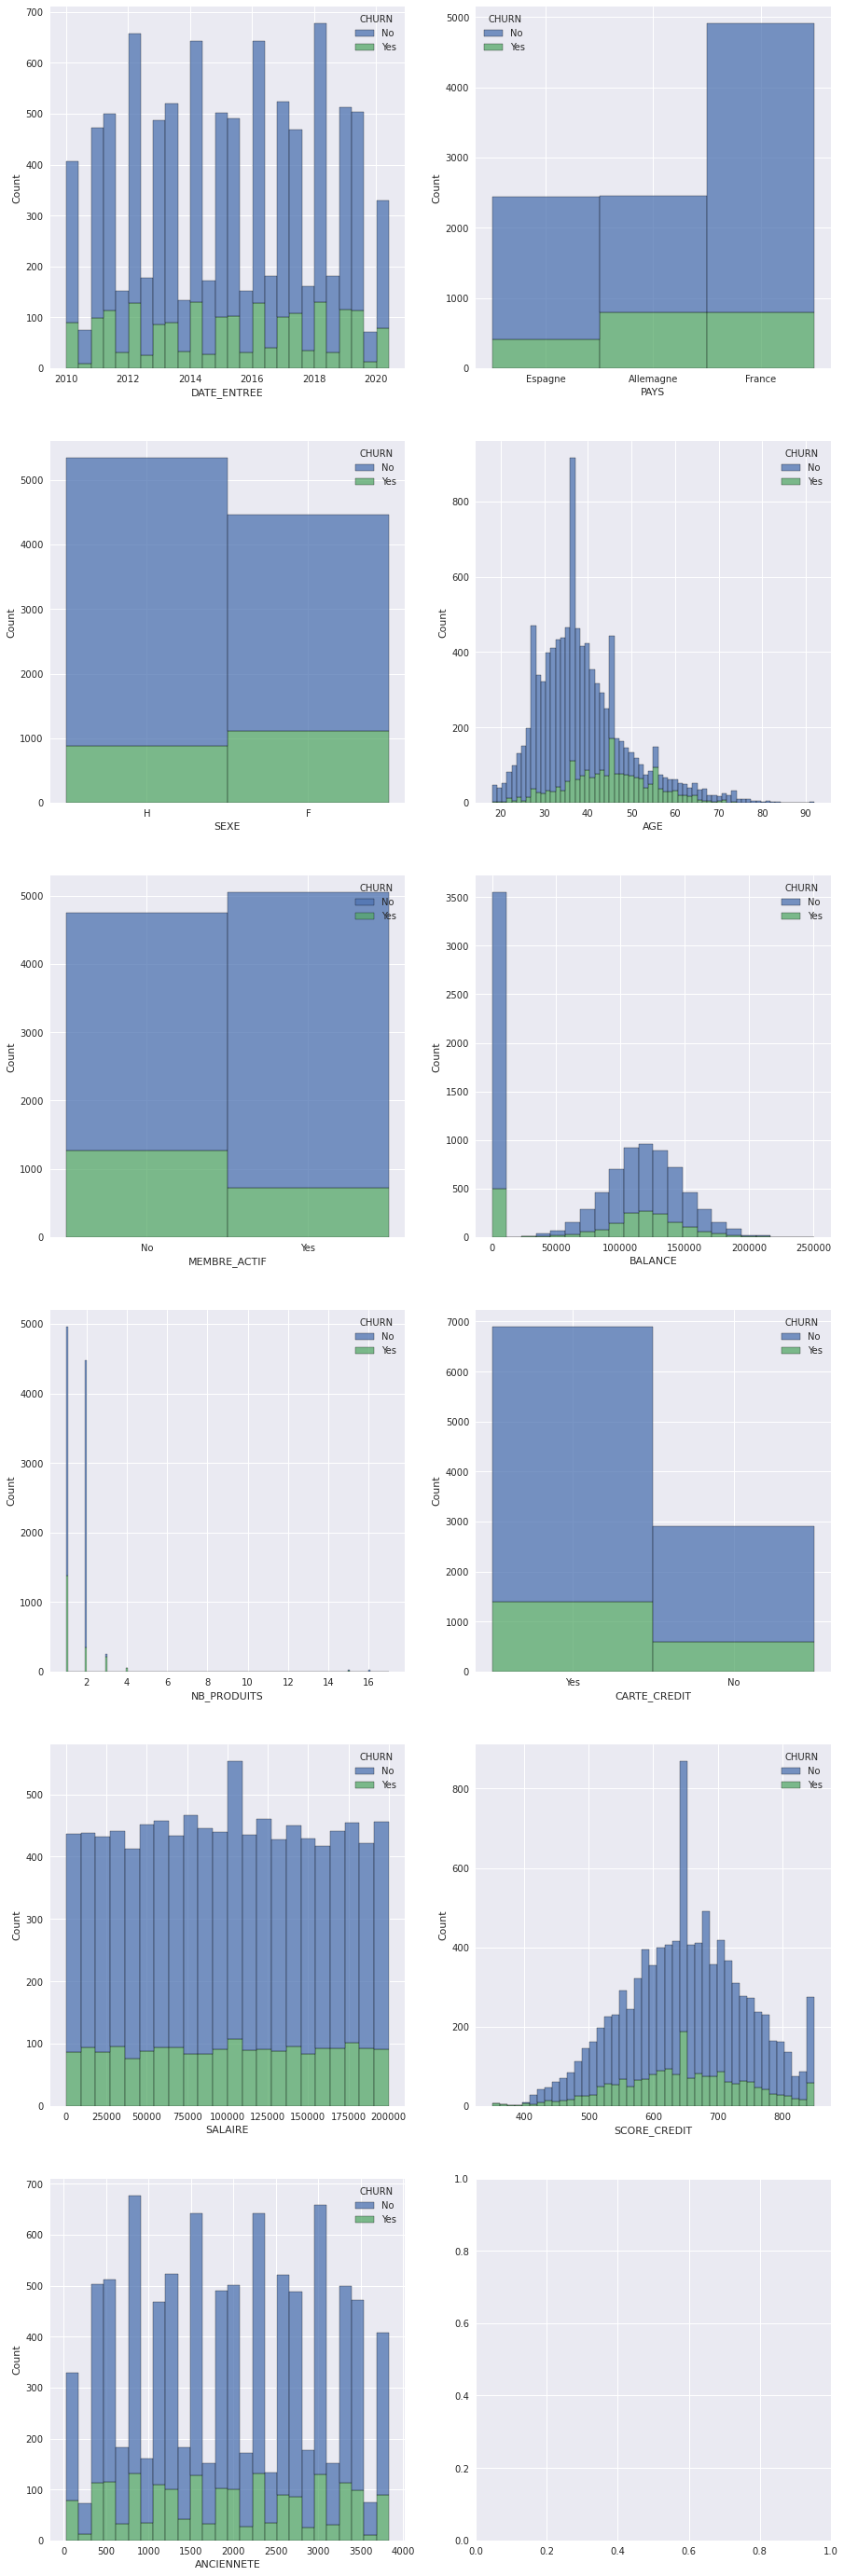

In [106]:
n_var = df.columns.size

plt.style.use('seaborn')

fig, axs = plt.subplots(6,2, figsize = [15,50])

i=0
for col in df.columns:
    if col != "CHURN":
        sns.histplot(df, x = col, hue="CHURN", multiple="stack", ax = axs[i//2, i%2])  
        i+=1      

### Corrélation des variables quantitatives entre elles :
- représentation des pair plots
- calcul et représentation des corrélations de Spearman et Pearson

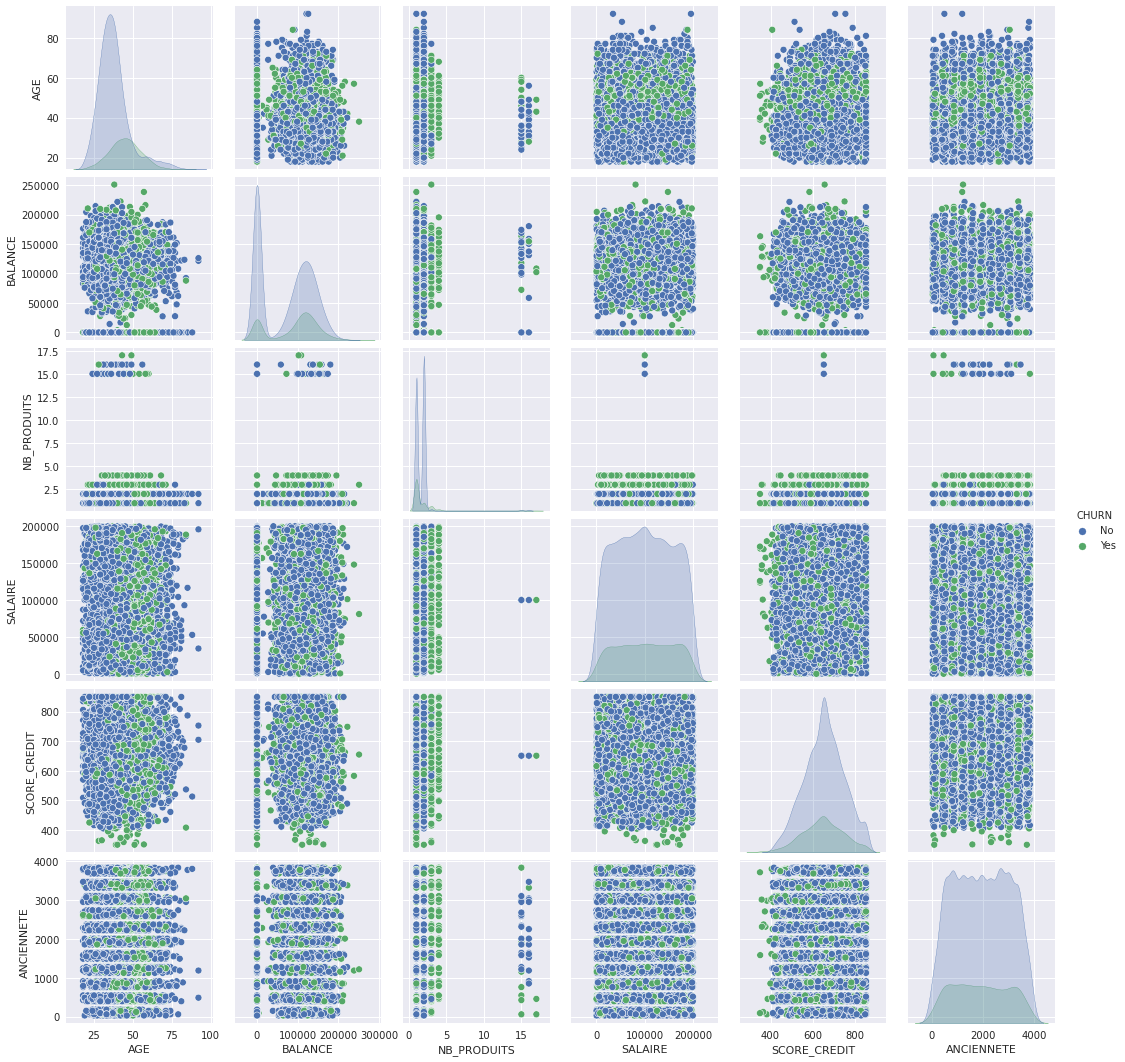

In [30]:
sns.pairplot(df, hue="CHURN")

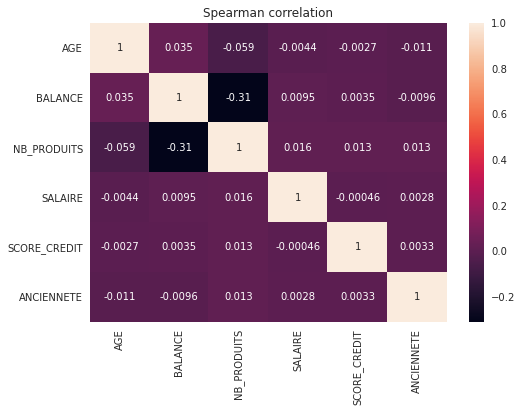

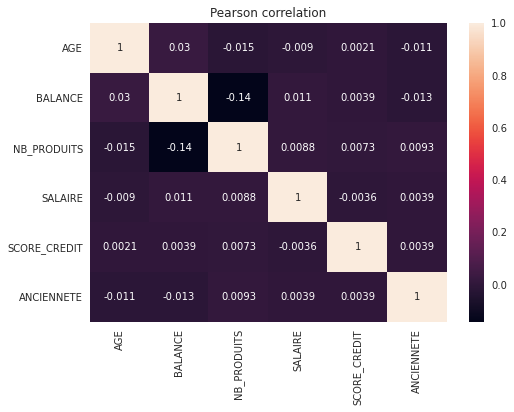

In [107]:
spearman_corr=df.corr(method="spearman")
pearson_corr=df.corr(method="pearson")
sns.heatmap(spearman_corr, annot=True).set_title("Spearman correlation")
plt.show()
sns.heatmap(pearson_corr, annot=True).set_title("Pearson correlation")
plt.show()

### Correlation between categorical variables

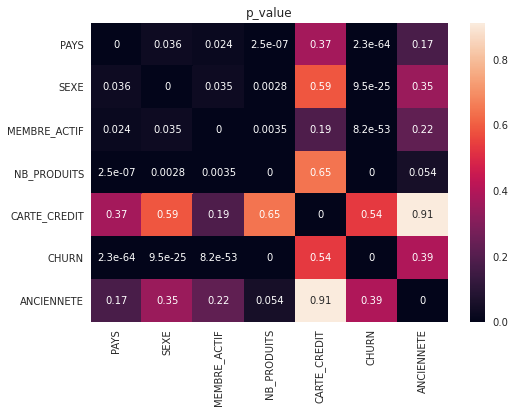

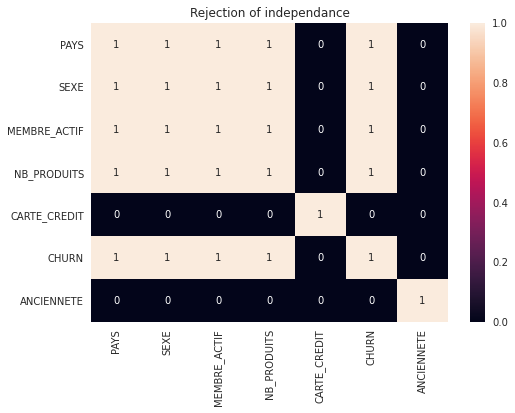

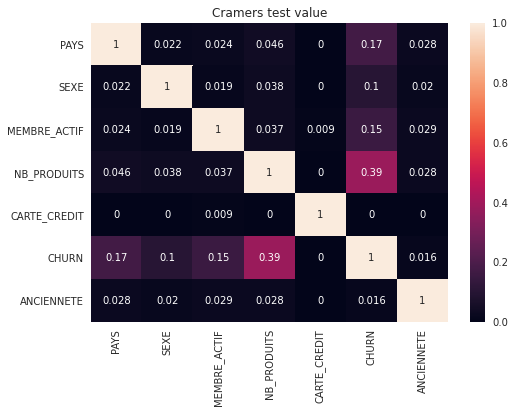

In [108]:
import scipy.stats as stats

factors_paired = [(i,j) for i in cat_variables for j in cat_variables] 
nb_cat = len(cat_variables)


def cramers_corrected_stat(conf_matrix):

    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    result=-1

    if conf_matrix.shape[0]==2:
        correct=False
    else:
        correct=True

    chi2 = stats.chi2_contingency(conf_matrix, correction=correct)[0]

    n = sum(conf_matrix.sum())
    phi2 = chi2/n
    r,k = conf_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    result=np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))
    return result

chi2, p_values, cramers =[], [], []

for f in factors_paired:
    if f[0] != f[1]:
        confusion_matrix = pd.crosstab(df[f[0]], df[f[1]])
        chitest = stats.chi2_contingency(confusion_matrix)
        cramers.append(cramers_corrected_stat(confusion_matrix))
        chi2.append(chitest[0])
        p_values.append(chitest[1])
    else:      # for same factor pair
        chi2.append(0)
        p_values.append(0)
        cramers.append(1)

chi2 = np.array(chi2).reshape((nb_cat,nb_cat)) # shape it as a matrix
df_chi2 = pd.DataFrame(chi2, columns = cat_variables, index = cat_variables)

p_values = np.array(p_values).reshape((nb_cat,nb_cat)) # shape it as a matrix
df_p_value = pd.DataFrame(p_values, columns = cat_variables, index = cat_variables)
df_reject_ind = df_p_value<0.05

cramers = np.array(cramers).reshape((nb_cat,nb_cat)) # shape it as a matrix
df_cramers = pd.DataFrame(cramers, columns = cat_variables, index = cat_variables)


# sns.heatmap(df_chi2, annot=True).set_title("Chi2 test value")
# plt.show()
sns.heatmap(df_p_value, annot=True).set_title("p_value")
plt.show()
sns.heatmap(df_reject_ind, annot=True).set_title("Rejection of independance")
plt.show()
sns.heatmap(df_cramers, annot=True).set_title("Cramers test value")
plt.show()

### Corrélation des variables qualitatives avec la variable cible CHURN

In [109]:
import scipy.stats as stats

corr = {}
for col in cat_variables:
    if col != "CHURN":
        crosstab = pd.crosstab(df[col], df["CHURN"])
        chi2, p_value, _, _ = stats.chi2_contingency(crosstab)
        cramers= cramers_corrected_stat(crosstab)
        corr[col] = [chi2, 
                     cramers,
                     p_value, 
                     p_value<0.05, 
                    ]
#         print(f" ------ Independance of {col} ------")
#         print(f"P-Value: {p_value} | Rejection of independance: {p_value<0.05}")

cat_corr = pd.DataFrame(corr).rename(index = {0: 'chi2',
                                              1: 'Cramers test value',
                                              2: 'p_value', 
                                              3: 'Rejection of independance',                                    
                                             }).transpose().sort_values(by='Cramers test value', ascending=0)
print(cat_corr)



                  chi2 Cramers test value      p_value  \
NB_PRODUITS    1459.34           0.385117            0   
PAYS           293.072           0.172349  2.29202e-64   
MEMBRE_ACTIF   233.958           0.154441  8.16965e-53   
SEXE           105.501           0.103524  9.48736e-25   
ANCIENNETE     67.4759          0.0158742      0.39251   
CARTE_CREDIT  0.380538                  0     0.537316   

             Rejection of independance  
NB_PRODUITS                       True  
PAYS                              True  
MEMBRE_ACTIF                      True  
SEXE                              True  
ANCIENNETE                       False  
CARTE_CREDIT                     False  


Les variables catégorielles ayant une influence sur le churn sont dans l'ordre d'influence décroissant :
- Nombre de produits
- Pays
- Membre actif/inactif
- Sexe

In [12]:
# Test only the effect of year
crosstab = pd.crosstab(df_pair_plot["DATE_ENTREE"].dt.year, df_pair_plot["CHURN"])
_, p_value, *_ = stats.chi2_contingency(crosstab)
print(f" ------ Independance of Year ------")
print(f"P-Value: {p_value} | Rejection of independance: {p_value<0.05}")


crosstab = pd.crosstab(df_pair_plot["DATE_ENTREE"].dt.month, df_pair_plot["CHURN"])
_, p_value, *_ = stats.chi2_contingency(crosstab)
print(f" ------ Independance of Month ------")
print(f"P-Value: {p_value} | Rejection of independance: {p_value<0.05}")

crosstab = pd.crosstab(df_pair_plot["DATE_ENTREE"].dt.day, df_pair_plot["CHURN"])
_, p_value, *_ = stats.chi2_contingency(crosstab)
print(f" ------ Independance of Day ------")
print(f"P-Value: {p_value} | Rejection of independance: {p_value<0.05}")

crosstab = pd.crosstab(df_pair_plot["DATE_ENTREE"].dt.weekday, df_pair_plot["CHURN"])
_, p_value, *_ = stats.chi2_contingency(crosstab)
print(f" ------ Independance of Weekday ------")
print(f"P-Value: {p_value} | Rejection of independance: {p_value<0.05}")


 ------ Independance of Year ------
P-Value: 0.23941352550775385 | Rejection of independance: False
 ------ Independance of Month ------
P-Value: 0.8502279928664216 | Rejection of independance: False
 ------ Independance of Day ------
P-Value: 1.0 | Rejection of independance: False
 ------ Independance of Weekday ------
P-Value: 0.34473561424164695 | Rejection of independance: False


### Select relevant features

In [110]:
categorical_features = ['PAYS', 
                        'SEXE', 
                        'MEMBRE_ACTIF',
                        'NB_PRODUITS'
                        ]
numeric_features = ['AGE', 
                    'BALANCE', 
                    'SCORE_CREDIT', 
                    'SALAIRE',
                    ]

selected_features = categorical_features + numeric_features

X = df[selected_features]
y = df['CHURN'].replace(to_replace=["Yes", "No"], value=[1,0])

### Preprocess data

In [111]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


numeric_transformer = Pipeline(steps=[
    # ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])


categorical_transformer = Pipeline(steps=[
    # ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

### Create training and test sets

In [71]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=42)


### Build and train different classifier models

In [72]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


clf_linsvc = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LinearSVC())])

clf_kneighbors = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', KNeighborsClassifier())])

clf_svc = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC())])

clf_randomforest = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

clf_dict = {'Linear SVC': clf_linsvc, 'K Neighbors': clf_kneighbors,'SVC': clf_svc, 'RandomForest': clf_randomforest}

for model, clf in clf_dict.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("{} Test Accuracy: {}%".format(model,round(score*100,1)))

Linear SVC Test Accuracy: 80.5%
K Neighbors Test Accuracy: 82.7%
SVC Test Accuracy: 85.2%
RandomForest Test Accuracy: 85.4%


In [ ]:
from sklearn.model_selection import cross_val_score

for model, clf in clf_dict.items():
    
    scores = cross_val_score(clf, X, y, cv = 5, scoring = 'accuracy')
    print("{} Mean Test Accuracy: {}%".format(model,round(scores.mean()*100,1)))

In [73]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__C': [0.1, 1.0, 10, 100],
    'classifier__kernel': ['rbf', 'poly']
}
grid_search = GridSearchCV(clf_svc, param_grid, cv=10)
grid_search.fit(X_train, y_train)

print(("best SVM score from grid search: %.3f"
       % grid_search.score(X_test, y_test)))
    